In [1]:
import torch
from torch import nn
from dltool import train,dataprocess

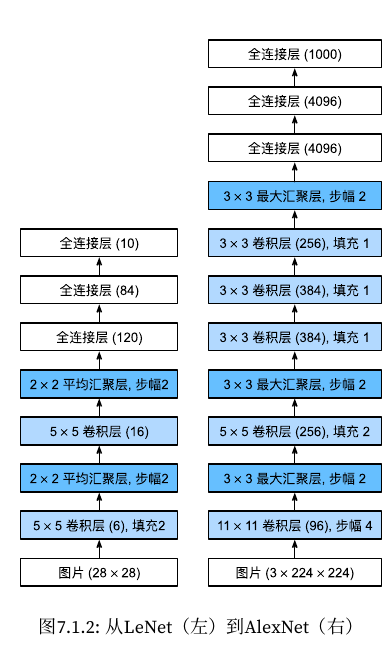

In [2]:

net = nn.Sequential(
  # 使用11X11窗口来捕捉对象
  # 步幅为4，减少输出的高度和宽度
  # 输出通道数>>LeNet
  nn.Conv2d(1,96,kernel_size=11,stride=4,padding=1), nn.ReLU(),
  nn.MaxPool2d(kernel_size=3,stride=2),
  # 减少卷积窗口，使用填充为2来使得输入与输出的高宽一致，且增大输出通道数
  nn.Conv2d(96,256,kernel_size=5,padding=2), nn.ReLU(),
  nn.MaxPool2d(kernel_size=3,stride=2),
  # 使用三个连续的卷积层和较小的卷积窗口
  # 除了最后的卷积层，输出通道的数量进一步增加
  # 在前两个卷积层之后，汇聚层不用于减少输出的高度和宽度
  nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
  nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
  nn.MaxPool2d(kernel_size=3,stride=2),
  nn.Flatten(),
  # 全连接层是LeNet的好几倍，使用dropout来减轻过拟合
  nn.Linear(6400,4096),nn.ReLU(),
  nn.Dropout(p=0.5),
  nn.Linear(4096,4096),nn.ReLU(),
  nn.Dropout(p=0.5),
  nn.Linear(4096,10)
)

In [3]:
batch_size = 128
train_iter, test_iter = dataprocess.load_data_fashion_mnist(batch_size, resize=224)

loss 0.333, train acc 0.879, test acc  0.874
cuda:0


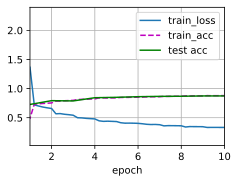

In [4]:
lr ,num_epochs = 0.01, 10
train.train_GPU(net, train_iter, test_iter, num_epochs, lr, train.try_gpu())